#### Introduction to Artificial Intelligence

**Dataset exploration**  
By: Santiago Jimenez

Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [30]:
train_data = pd.read_csv("data/train.csv", header=0)
train_data.drop(columns = ["id"], inplace = True)

Print dataframe info

In [4]:
# Print dataframe size
print("Dataframe size:", train_data.shape)

Dataframe size: (11504798, 12)


In [31]:
# Print the first few rows of the dataframe
print("First few rows of the dataframe:")
train_data.head()

First few rows of the dataframe:


,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [8]:

# Summary statistics of the dataset
print("Summary statistics of the dataset:")
train_data.describe()

Summary statistics of the dataset:


,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07
mean,5.752398e+06,3.838356e+01,9.980220e-01,2.641869e+01,4.629966e-01,3.046137e+04,1.124254e+02,1.638977e+02,1.229973e-01
std,3.321149e+06,1.499346e+01,4.443120e-02,1.299159e+01,4.986289e-01,1.645475e+04,5.403571e+01,7.997953e+01,3.284341e-01
min,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.630000e+03,1.000000e+00,1.000000e+01,0.000000e+00
25%,2.876199e+06,2.400000e+01,1.000000e+00,1.500000e+01,0.000000e+00,2.527700e+04,2.900000e+01,9.900000e+01,0.000000e+00
50%,5.752398e+06,3.600000e+01,1.000000e+00,2.800000e+01,0.000000e+00,3.182400e+04,1.510000e+02,1.660000e+02,0.000000e+00
75%,8.628598e+06,4.900000e+01,1.000000e+00,3.500000e+01,1.000000e+00,3.945100e+04,1.520000e+02,2.320000e+02,0.000000e+00
max,1.150480e+07,8.500000e+01,1.000000e+00,5.200000e+01,1.000000e+00,5.401650e+05,1.630000e+02,2.990000e+02,1.000000e+00


In [10]:

# Check for missing values
print("Missing values in the dataset:")
train_data.isnull().sum()

Missing values in the dataset:


id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [11]:
# Data types of each column
print("Data types of each column:")
train_data.dtypes

Data types of each column:


id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

Plot histograms for a few of the columns

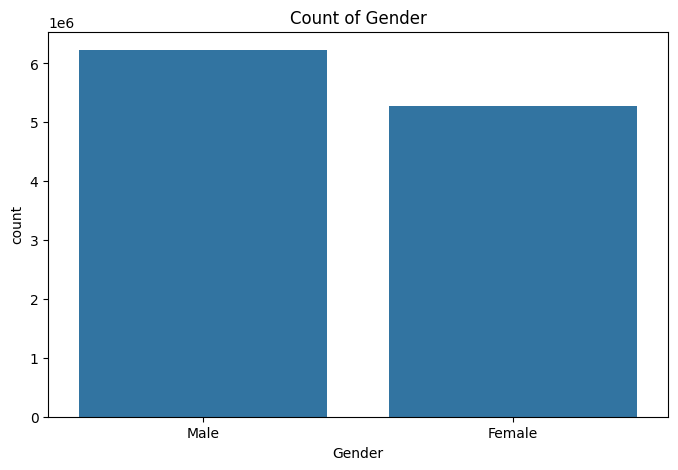

In [12]:
# Count plot for Gender
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x='Gender')
plt.title('Count of Gender')
plt.show()

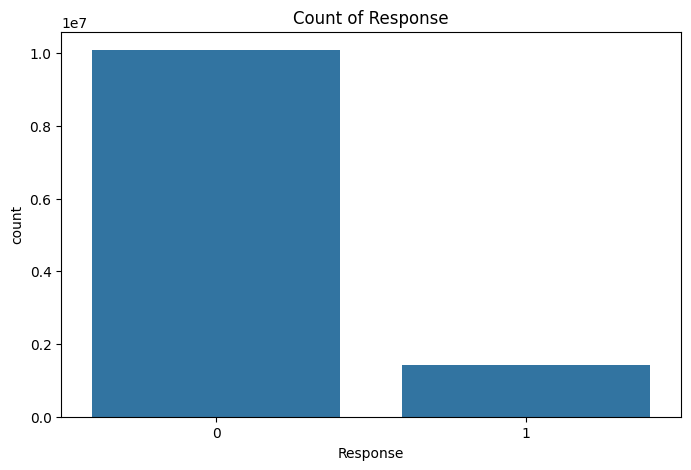

In [13]:
# Count plot for Response
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x='Response')
plt.title('Count of Response')
plt.show()

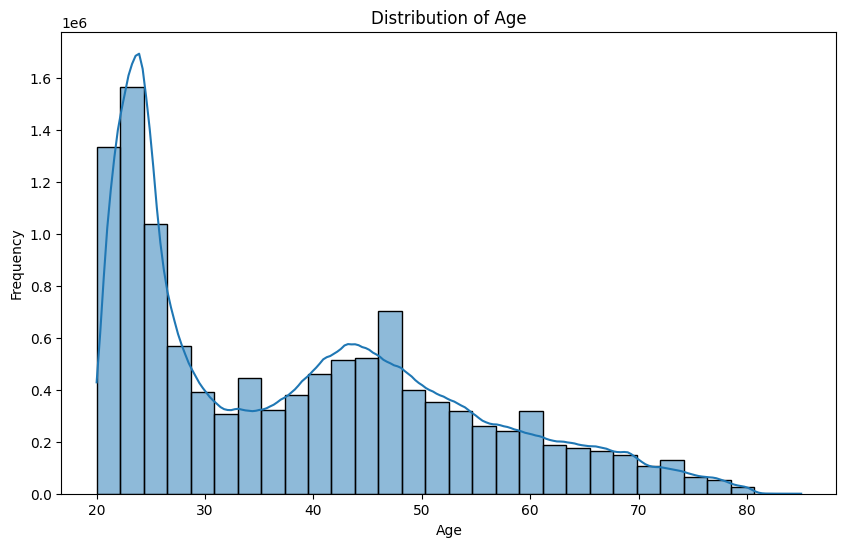

In [14]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

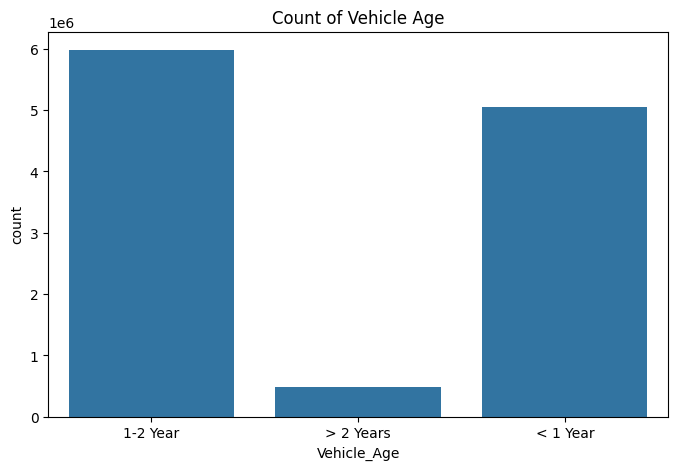

In [16]:
# Count plot for Vehicle Age
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x='Vehicle_Age')
plt.title('Count of Vehicle Age')
plt.show()

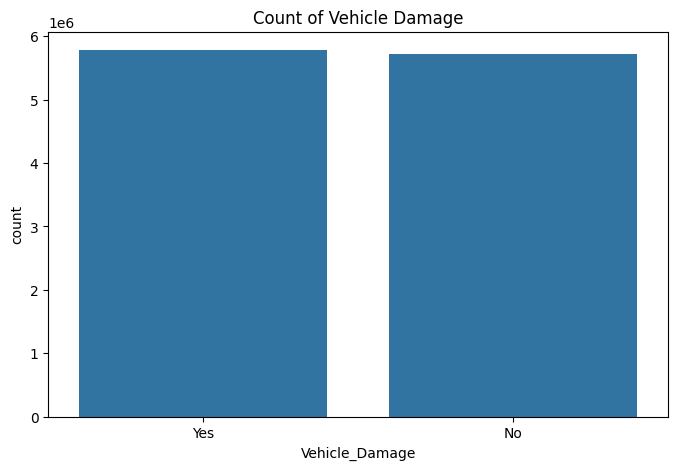

In [17]:
# Count plot for Vehicle Damage
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x='Vehicle_Damage')
plt.title('Count of Vehicle Damage')
plt.show()

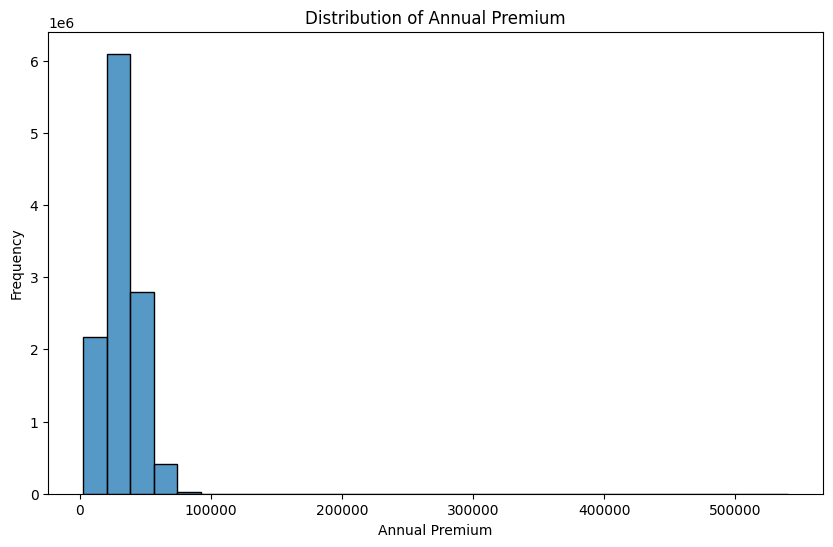

In [19]:
# Distribution of Annual Premium
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Annual_Premium'], bins=30)
plt.title('Distribution of Annual Premium')
plt.xlabel('Annual Premium')
plt.ylabel('Frequency')
plt.show()

**Following 2 code cells taken from Huthayfa Hodeb's notebook**

Checking for outliers

In [22]:
continuous = list(train_data.select_dtypes(exclude = "O").columns)[:-1]

categorical = list(train_data.select_dtypes(include = "O").columns)


print('There are {} continuous variables'.format(len(continuous)))
print('There are {} categorical variables'.format(len(categorical)))

There are 8 continuous variables
There are 3 categorical variables


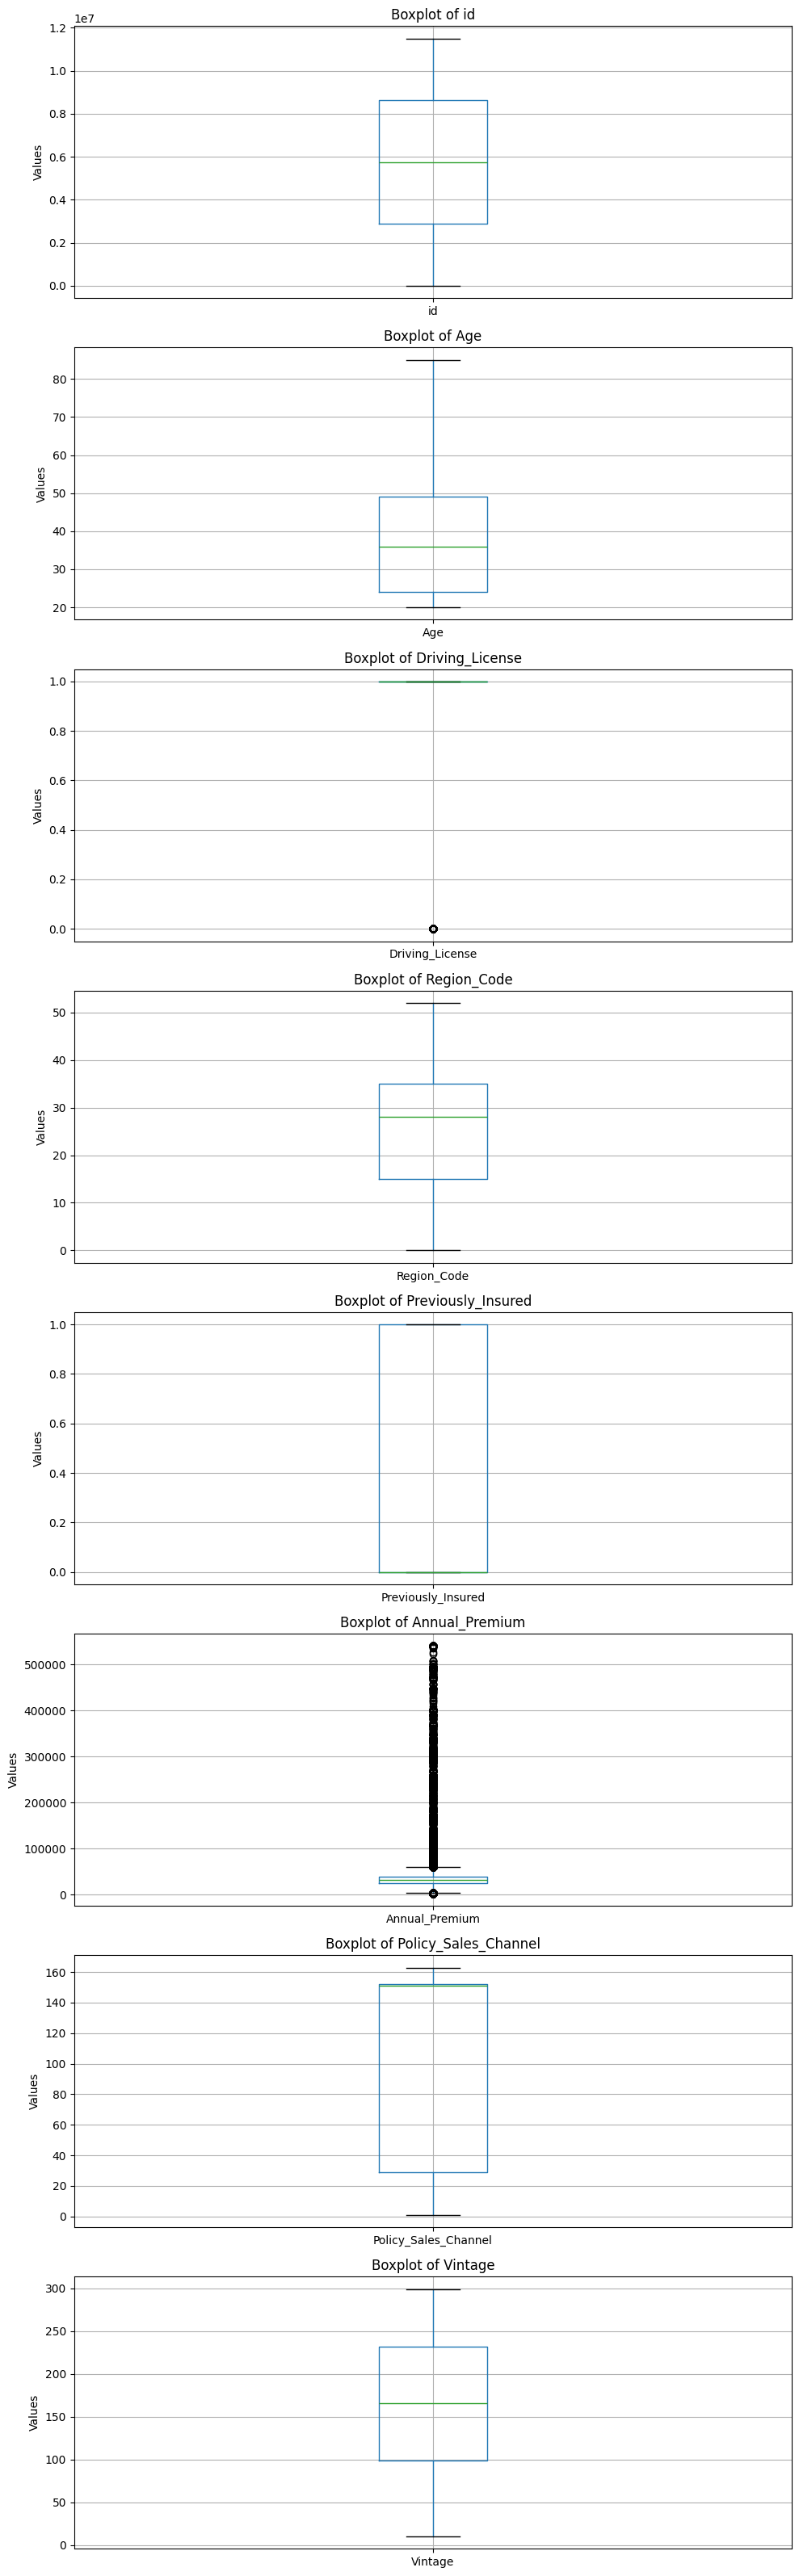

In [23]:
num_cols = len(continuous)
fig, axes = plt.subplots(num_cols, 1, figsize=(10, 4 * num_cols))

for i, col in enumerate(continuous):
    train_data.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel('')  
    axes[i].set_ylabel('Values')

plt.tight_layout()
plt.show()

Handle categorical variables

In [35]:
# Define the categorical mappings
categorical_mappings = [
    {'Female': 0, 'Male': 1},
    {'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2, 'Unknown': -1},
    {'No': 0, 'Yes': 1, 'Unknown': -1}
]

# Apply the mappings to the categorical columns
train_data['Gender'] = train_data['Gender'].replace(categorical_mappings[0])
train_data['Vehicle_Age'] = train_data['Vehicle_Age'].replace(categorical_mappings[1])
train_data['Vehicle_Damage'] = train_data['Vehicle_Damage'].replace(categorical_mappings[2])

# Print
train_data.head()




,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,21,1,35.0,0,1,1,65101.0,124.0,187,0
1,1,43,1,28.0,0,2,1,58911.0,26.0,288,1
2,0,25,1,14.0,1,0,0,38043.0,152.0,254,0
3,0,35,1,1.0,0,1,1,2630.0,156.0,76,0
4,0,36,1,15.0,1,1,0,31951.0,152.0,294,0
